# Problem Set 2


## An econometric analysis of Engel curves for U.S. households
In problem set 1, we undertook the initial analysis of the data and discussed regression models of Engel curves for food, clothes and alcohol. The objective of this week’s problem set is to estimate a simple regression model of the Engel curve using the OLS estimator.

The starting point is a regression model with one explanatory variable. Specifically, let us consider the case where the dependent variable represents food expenditures, while the explanatory variable is total expenditure:

\begin{align}
\text{xfath}_i = \beta_0 + \beta_1 \text{xtot}_i + u_i \tag{1}
\end{align}

In the consumption literature, it is common to use expenditure share, $\text{xfath}/\text{xtot}$, as the dependent variable instead of using total food expenditures. Furthermore, the logarithm of total expenditure deflated by an individual ”consumer price index” is often used as the explanatory variable. In this case, the regression model is:

\begin{align}
\frac{\text{xfath}_i}{\text{xtot}_i} = \delta_0 + \delta_1 \log \left(\frac{\text{xtot}_i}{\text{price}_i}
\right) + v_i \tag{2}
\end{align}


## Group work: Discuss model (2)

### Question 1
**Task:** What is the interpretation of $\delta_1$ when $%
\delta_1>0$ and $\delta_1<0$? 
(Hint: luxury versus necessity goods)

**Your answer:**

$\delta_1$ is more positive the more luxury items you buy. $\delta_1$ is negative when you only buy necessary items.

### Question 2
**Task:** What is likely to be included in the error term in model (2)?
(Hint: What other variables may influence the dependent variable, $\text{xfath}/\text{xtot}$, besides the explanatory variable?)

**Your answer:**

The variable `rest` could have an influence on the variable $\frac{xfath}{xtot}$   


## Python exercises

### Exercise 1: Estimate model (1)
In this exercise, we are going to estimate model (1) **for men only** using OLS:
\begin{align}
\text{xfath}_i = \beta_0 + \beta_1 \text{xtot}_i + u_i \tag{1}
\end{align}

To do this, revisit the lecture notebook and use the `statsmodels` approach described there.



---

**Task 1.** Load the data from PS2.dta

**Your code:**

In [14]:
import pandas as pd
data = pd.read_stata('PS2.dta')
data_men = data[data.dmale == 1]
data_men["const"] = 1 

/var/folders/t8/yyf6tw7s1cgdcccrl9_2c67r0000gn/T/ipykernel_757/752156457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_men["const"] = 1


**Task 2:** Estimate model (1) **for the male participants in the survey** only using the `statsmodels` module as described in lecture.

**Your code:**

In [16]:
import statsmodels.api as sm

# OLS estimation vha OLS fra statsmodels

model_sm = sm.OLS(data_men['xfath'], data_men[['const', 'xtot',]]).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  xfath   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.11
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           0.000354
Time:                        09:07:49   Log-Likelihood:                -2157.0
No. Observations:                 258   AIC:                             4318.
Df Residuals:                     256   BIC:                             4325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1443.0723    195.086      7.397      0.0


**Task 3:** What is the interpretation of the slope $\beta_1$ and intercept $\beta_0$ in model (1)? 


**Your answer:**

 I denne model er $\beta_0$ det mindste antal af penge som bruges på mad, da total expenditure ikke kan være negativ.

 
 $\beta_1$ er det som tilføjes pr. total expenditure.

**Task 4:** What is the estimate of the slope? And the intercept?



**Your answer:**

$\beta_0 = 1443.0723$ og $\beta_1 = 0.0488$

**Task 5:** What is the total variation in the dependent variable, SST? The explained variation in the dependent variable, SSE? The variation in the residuals, SSR?

_Hint:_ You can calculate these statistics manually using the code from the lecture. Alternatively, you can access the statistics directly as properties of your OLS results object `sm.OLS.fit()`. If you named this object `results`, you can access the SST using `results.centered_tss`, the SSR using `results.ssr` and the SSE using `results.ess`.

**Your code:**

In [21]:
print("SST =",model_sm.centered_tss)
print()
print("SSR =",model_sm.ssr)
print()
print("SSE =",model_sm.ess)

SST = 290257414.4844961

SSR = 276117266.31026345

SSE = 14140148.174232662


**Task 6:** Find the coefficient of determination, $R^2$. How can it be calculated from the three measures from the previous question? How would you interpret the calculated $R^2$?


**Your answer:**

$R^2$ is calculated by $\frac{SSE}{SST}$. It says how much of the model is explained by the explaining variable. Here the $R^2 = 0.049$, ergo the variable `xtot` only explains 5% of the variable `xfath`

**Task 7:** What is the estimate of the variance of the error term, $\hat \sigma^2$?

_Hint:_ use `results.mse_resid` to retrieve the estimated variance of the error term directly from the model object

**Your code:**

In [26]:
print("sigma^2 =",model_sm.mse_resid)

sigma^2 = 1078583.0715244666


**Your answer:**

### Exercise 2: Illustrate the estimated Engel curve

**Task 1:** Illustrate the estimated Engel curve in a graph together with a scatterplot of the actual data observations. 

_Hints:_ To plot the estimated Engel curve, you need the $\hat{y}$ values (your estimated xfath values) for each of the observed $x$-values (the xtot values) in the dataset. When plotted together, these $\hat{y}$ values form the line estimated by OLS.

If your OLS results object is called `results` and your observations of xtot are called `X`, you can extract the $\hat{y}$ values like this:

```py
y_hat = results.predict(X)
```

To do a lineplot in Seaborn, use the `sns.lineplot(x, y, data)` method.

To layer two plots on top of each other, simply execute two Seaborn commands after one another in a single cell.

**Your code:**

<Axes: ylabel='xfath'>

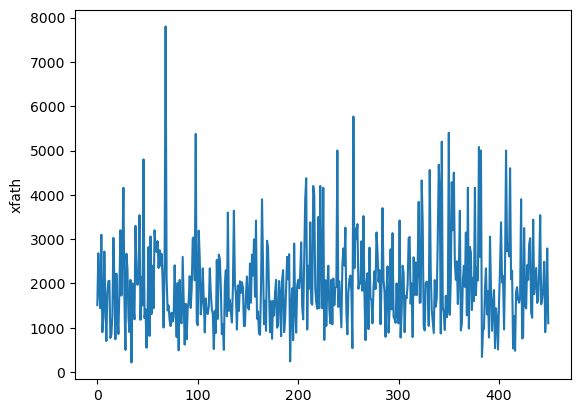

In [43]:
y_hat = model_sm.predict()
import seaborn as sns
sns.lineplot(data.xfath)

**Task 2:** Perform scatterplots of the residuals from the regression against xtot and the predicted value of food consumption, separately.What shall you expect given the assumptions presented in the lectures? Should you expect the total expediture to correlate with the residuals? 

_Hint:_
You can access the residuals using the `.resid` property of your results object.

_Pro tip:_ You can manually change the labels of the y- and x-axis of Seaborn plots by adding `.set(ylabel="Residuals", xlabel="xtot")` to the end of your plot command

**Your code:**

In [1]:
#Task 2a 


In [2]:
# Task 2b


Remember the mechanical properties of the OLS estimator: The residuals sum to zero, $E(u)=0$, and are always uncorrelated with the explanatory variables, $E(x|u)=0$

### Exercise 2: Estimate model (2)

In this exercise, we are going to estimate model (2) for men and women individually:
\begin{align}
\frac{\text{xfath}_i}{\text{xtot}_i} = \delta_0 + \delta_1 \log \left(\frac{\text{xtot}_i}{\text{price}_i}
\right) + v_i \tag{2}
\end{align}


**Task 1:** Construct the variables needed to estimate model (2). 

_Hint:_ The $\text{price}_i$ variable is included in the dataset under the name `price`.


**Your code:**

**Task 2:** Estimate model (2) by OLS for the budget shares of food, clothing and alcohol for men and women, separately. For each gender and each of the three expenditure categories, print the estimated slope parameters. 

_Hint_: Write a nested for-loop where you estimate the model and print the parameter estimate for each of the genders and and each of the three dependant variables. 

To access the individual model parameters, you can use the `.params` property of the results object. For example, if you have an explanatory variable called `log_xtot_adj`, you can access the parameter estimate like this:


```py
model = sm.OLS(y, X)
results = models.fit()
delta1 = results.params['log_xtot_adj']
```

**Your code:**

**Task 3:** Interpret the estimation results in light of the discussion on luxury versus necessity goods (see group work). Which parameter is central to the analysis? What conclusions can be drawn on the basis of the analysis?

**Your answer:**

## Theoretical exercise
Solve the following theoretical exercises (using pen and paper). Estimated time for the exam is 30
minutes.

**Task 1:**
Write up the simple linear regression model (SLR) with a constant term and 1
explanatory variable in matrix form for $n$ observations.

**Task 2:** Write the OLS estimator in matrix form. Show that when one
calculates the OLS estimator, then: 
\begin{equation*}
\widehat{\beta }_{0}=\bar{y}-\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y%
})}{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}\bar{x},\qquad \widehat{\beta }_{1}=%
\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{n}(x_{i}-%
\bar{x})^{2}}
\end{equation*}%
where $\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_{i}$ and $\bar{y}=\frac{1}{n}%
\sum_{i=1}^{n}y_{i}$.

_Hints_: Use the following rule for inverting a matrix: 
\begin{equation*}
\left[ 
\begin{array}{cc}
a & b \\ 
c & d%
\end{array}%
\right] ^{-1}=\frac{1}{ad-bc}\left[ 
\begin{array}{cc}
d & -b \\ 
-c & a%
\end{array}%
\right]
\end{equation*}
as well rules (A.7) and (A.8) in Math Refresher A in the textbook.
